# Banco de Dados IMDB
Link para o Banco de Dados: https://www.imdb.com/interfaces/

#### Sobre o conteúdo
Todo o conteúdo aqui mostrado, foi ministrado pela <a href=https://www.datascienceacademy.com.br>Data Academy Science</a> no curso <a href=https://www.datascienceacademy.com.br/course/python-fundamentos>Python Fundamentos Para Análise de Dados 3.0</a> para o desenvolvimento ínicial na Exploração de Dados com as linguagem Python e SQL e os principais e mais pacotes na Analise de Dados.
<br>
<br>
<br>
#### Sobre a Analise Exploratoria
Vamos explorar o Banco de dados da IMDB que contém informações sobre Cinema, TV, Música e Jogos. Sendo considerado um dos maiores datasets para o mundo da cinematografia.

Vamos aplicar a Análise Exploratória de Dados para responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

***
### Importando o Conteúdo e Pacotes

In [1]:
%%time
!pip install -q imdb-sqlite
!pip install -q pycountry

Wall time: 5.39 s


In [36]:
%%time
import re
import time
import sqlite3
import pycountry
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

from matplotlib import cm
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from IPython.core.display import HTML

Wall time: 999 µs


### Carregando os Dados

In [3]:
%%time
!imdb-sqlite

Wall time: 261 ms


2022-04-16 14:23:03,645 DB already exists: (imdb.db). Refusing to modify. Exiting


In [4]:
# Conectando no banco de dados e extraindo as lista de Tabelas
conn = sqlite3.connect("imdb.db")
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type='table'", conn)
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [5]:
# Convertendo o Dataframe(tabelas) em lista
tabelas = tabelas["Table_Name"].values.tolist()

# Pecorrendo a lista de tabelas no banco de dados para extrair o esquema
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema de tabela", tabela)
    display(resultado)
    print("-"*50)
    print("\n")

Esquema de tabela people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


--------------------------------------------------


Esquema de tabela titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


--------------------------------------------------


Esquema de tabela akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


--------------------------------------------------


Esquema de tabela crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


--------------------------------------------------


Esquema de tabela episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


--------------------------------------------------


Esquema de tabela ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


--------------------------------------------------




## Analise Exploratoria

***
### 1- Quais São os Tipos Mais Comuns no IMDB?
Contando as quantidados de tipos e quais são as mais comuns.

##### Consultado o Banco de Dados

> Vamos contar a quantidade de Filmes por categoria e criar um coluna de porcentagem para uma fácil visualização.

In [6]:
# Consultando e contando a quantidade de Filmes por categoria
consulta1 = '''SELECT type, COUNT(*) AS QUANTIDADE FROM titles GROUP BY type'''
resultado1 = pd.read_sql_query(consulta1, conn)

# Criando e calculando a coluna PERCENTUAL
resultado1['PERCENTUAL'] = (resultado1['QUANTIDADE'] / resultado1['QUANTIDADE'].sum()) * 100
display(resultado1)

,type,QUANTIDADE,PERCENTUAL
0,movie,607151,6.862806
1,short,864646,9.773347
2,tvEpisode,6635858,75.007050
3,tvMiniSeries,42981,0.485827
4,tvMovie,135725,1.534140
5,tvPilot,2,0.000023
6,tvSeries,223457,2.525800
7,tvShort,10516,0.118865
8,tvSpecial,36547,0.413101
9,video,259217,2.930006


> Podemos observar que muitas categorias com a porcentagem abaixo de 1% alguns até com porcentagem e quantidades quase que insignicante para a analise, como por exemplo a categoria tvPilot que só tem 2 Filmes.<p>
Vamos filtrar e agregar essas categorias que estão abaixo de 5%, criando uma nova categoria chamada "others".

In [7]:
# Criando e agregando as categorias na lista others
others = {}
others['QUANTIDADE'] = resultado1[resultado1['PERCENTUAL'] < 5]['QUANTIDADE'].sum()
others['PERCENTUAL'] = resultado1[resultado1['PERCENTUAL'] < 5 ]['PERCENTUAL'].sum()
others['type'] = 'others'

# Filtrando o Dataframe e juntando com a categoria "others" em ordem ascendente.
resultado1 = resultado1[resultado1['PERCENTUAL'] > 5]
resultado1 = resultado1.append(others, ignore_index = True)
resultado1 = resultado1.sort_values(by = 'QUANTIDADE', ascending = False)
resultado1.head()

,type,QUANTIDADE,PERCENTUAL
2,tvEpisode,6635858,75.007050
1,short,864646,9.773347
3,others,739324,8.356796
0,movie,607151,6.862806


##### Gráfico

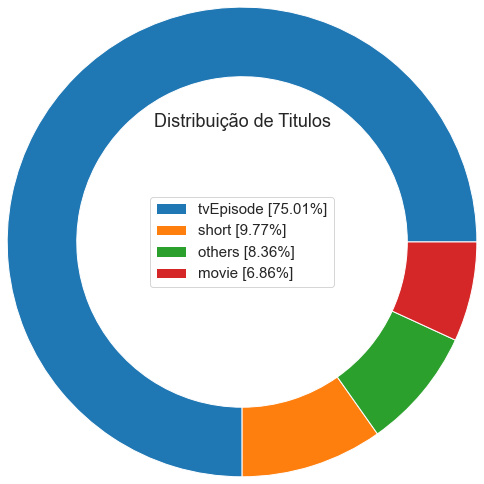

In [8]:
labels = [str(resultado1['type'][i])+' '+'['+ str(round(resultado1['PERCENTUAL'][i],2))+'%'+ ']' for i in resultado1.index]
cs = cm.tab10(np.arange(100))
f = plt.figure()
plt.pie(resultado1['QUANTIDADE'], labeldistance = 1, radius = 2.7, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':15})
plt.title("Distribuição de Titulos", loc = 'Center', fontdict = {'fontsize':18, 'fontweight':20})
plt.show()

<p>Podemos identificar que o tipo tvEpisode possui a maior quantia de conteúdo adicionado na plataforma.


*******
### 2 - Qual o números de títulos por Gêneros?
Calculando o número de títulos por gênero e entregando os resultado em porcentagem.

##### Consultado o Banco de Dados
> Vamos verificar o gêneros da tabela titles

In [9]:
# Consultando e contando a quantidade de Filmes por categoria
consulta2 = '''SELECT genres, COUNT(*) AS QUANTIDADE from titles GROUP BY genres'''
resultado2 = pd.read_sql_query(consulta2, conn)
display(resultado2)

,genres,QUANTIDADE
0,Action,34244
1,"Action,Adult",151
2,"Action,Adult,Adventure",66
3,"Action,Adult,Animation",65
4,"Action,Adult,Comedy",42
...,...,...
2304,"Thriller,Western",45
2305,War,2719
2306,"War,Western",14
2307,Western,13813


> Podemos observar duas situações. A linha 2308 sem nenhuma classificação(\N) e alguns titulos possuem mais de um gênero classificado.<p>Vamos remover a linha sem informações e consolidar os gêneros para uma rápida e fácil contagem.

In [10]:
# Convertendo as string em minusculo e removendo valores NA
resultado2['genres'] = resultado2['genres'].str.lower().values
temp = resultado2['genres'].dropna()

# Criando um vetor com expressão regular para filtrar strings
padrao = '(?u)\\b[\\w-]+\\b'
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

# Vetorizando o dataset sem valores NA
bag_generos = vetor.transform(temp)

# Criando lista e covertando em dataframe
generos_unicos = vetor.get_feature_names()
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

# Removendo o valor N da linha 18 da variavél generos
generos = generos.drop(columns = 'n', axis = 0)

# Fazendo calculo em porcentagens
generos_percentual = 100 * pd.Series(generos.sum().sort_values(ascending = False) / generos.shape[0])
generos_percentual.head()

comedy         14.595063
drama          14.161975
short          13.945431
documentary    12.862711
adventure      12.602858
dtype: float64

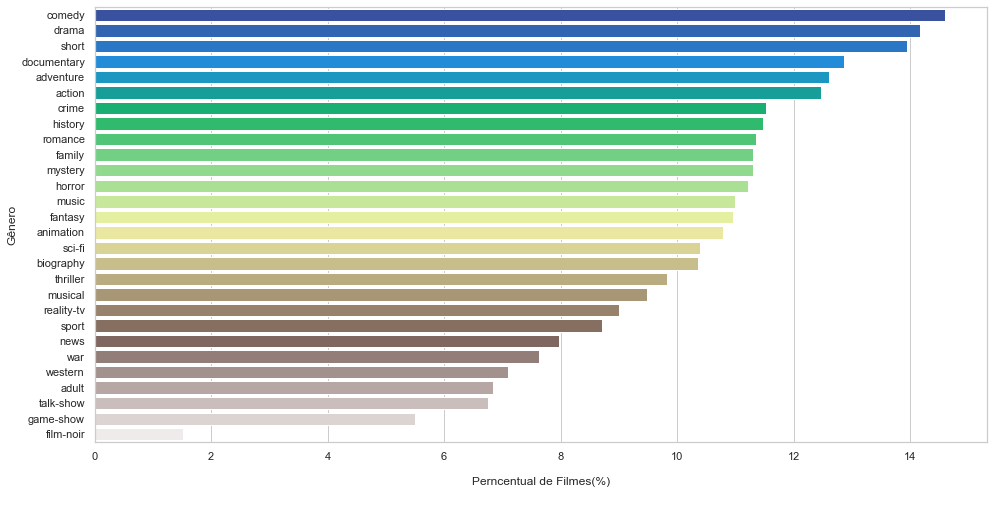

In [11]:
# Grafico
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')
plt.xlabel('\nPerncentual de Filmes(%)\n')
plt.show()

> Podemos ver que o gênero comédia possui a maior quantidade de conteúdo adicionado na plataforma até o momento seguido pelo gênero drama e logo após para minha surpresa curtas.

***
### 3 - Qual a Mediana de Avaliação dos FIlmes Por Gênero?
Calculando a mediana de avaliações dos filmes por gêneros.

##### Consultado o Banco de Dados
> Vamos verificar as tabelas de avaliações e gênero.

In [12]:
consulta3 = '''
            SELECT rating, genres FROM ratings JOIN titles ON ratings.title_id = titles.title_id WHERE premiered <= 2023 AND type = 'movie'
            '''
resultado3 = pd.read_sql_query(consulta3, conn)
display(resultado3)

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.6,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
277094,5.8,Thriller
277095,6.4,"Drama,History"
277096,3.6,"Adventure,History,War"
277097,8.3,Drama


> Aqui temos a mesma situação que teve na pergunta anterior sobre a coluna gêneros e os valores nuloss<p>
    Vamos criar uma função para ser usado nas futuras perguntas caso seja necessario.

In [13]:
# Função
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

# Variável para os gêneros
generos_unicos = retorna_generos(resultado3)



In [14]:
# lista para o DataFrame Quantidade e Avaliação
genero_counts = []
genero_ratings = []

# Buscando os dados via SQL
for item in generos_unicos:
    
    # Retornando a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
    
    # Retornando a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))
    
# Dataframe
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

# Ordenando o resultado e mostrando 10 primeiro resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)
display(df_genero_ratings.head(10))

,genres,count,rating
7,documentary,41301,7.30
18,news,654,7.30
22,short,22,7.15
24,talk-show,10,7.05
4,biography,8425,7.00
13,history,7652,6.90
12,game-show,4,6.80
23,sport,3311,6.70
3,animation,4760,6.60
26,war,5931,6.60


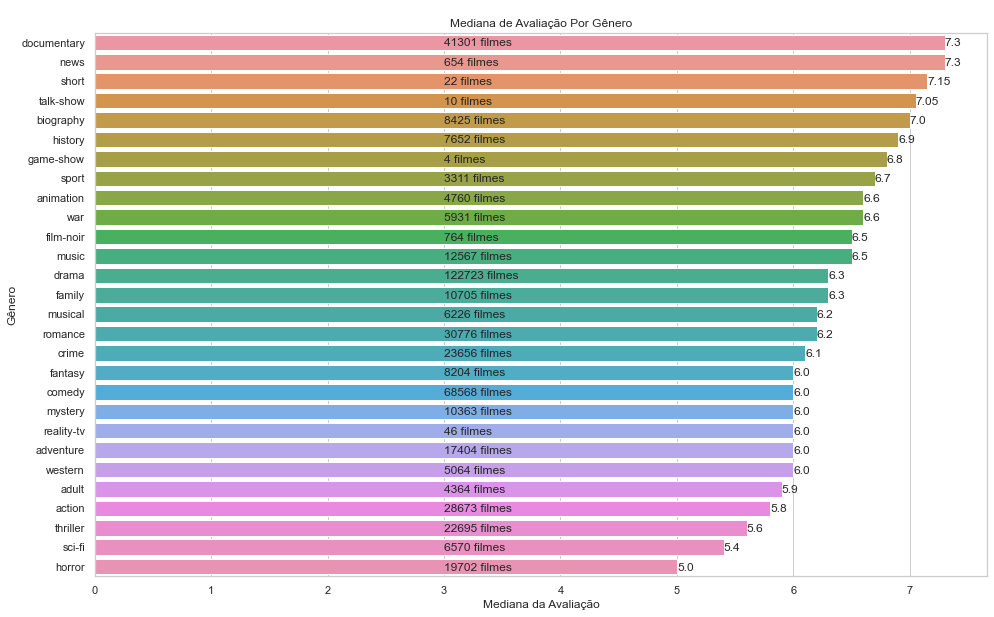

In [15]:
# Plot
plt.figure(figsize = (16, 10))
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

#textos no gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(3.0,
            i + 0.20,
            str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
            i + 0.20,
            round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))
    
plt.ylabel('Gênero')
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero')
plt.show()

***
### 4 Qual a mediana de Avaliação de Filme do Ano de Estreia?
Calculando a mediana de avaliações dos filmes pelo Ano de Estreia.

##### Consultado o Banco de Dados
> Vamos verificar as tabelas de Avaliações e Ano de Estreia.

In [16]:
consulta4 = '''
            SELECT rating AS Avaliação, premiered AS Estreia FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered  <= 2023 AND type = 'movie'
            ORDER BY premiered
            '''
resultado4 = pd.read_sql_query(consulta4, conn)
display(resultado4)

,Avaliação,Estreia
0,6.2,1896
1,4.5,1897
2,4.0,1899
3,3.7,1899
4,6.0,1900
...,...,...
277094,9.2,2022
277095,5.6,2022
277096,6.0,2022
277097,5.0,2022


> Tudo certo com essa consulta aqui. Vamos prosseguir com o calculo da mediana das Avaliações.

In [17]:
# Criando lista ratings com as mediandos
ratings_median = []
for year in set(resultado4 ['Estreia']):
    ratings_median.append(np.median(resultado4[resultado4['Estreia'] == year]['Avaliação']))
anos = list(set(resultado4['Estreia']))

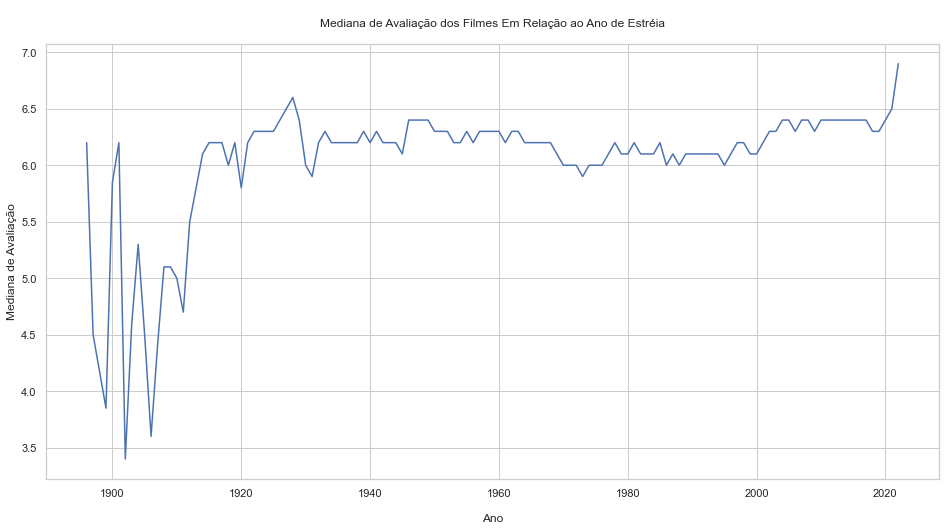

In [18]:
plt.figure(figsize = (16,8))
plt.plot(anos, ratings_median)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

> Aqui as coisas ficam interessando percebemos que os filmes mais antigos do final dos seculo 19 e inicio dos anos 20 até a decada de 30 possuem uma grande descrepancia, isso pode ter sido causado por diversos fatores como por exemplo a disponibilidade desses filmes para o público podendo causar falta de conhecimento e/ou interesse em assistir. 

***
### 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estreia?
Calculando o valor total das avaliações dos filmes pelo Ano de Estreia.

##### Consultado o Banco de Dados
> Vamos consultar a coluna gêneros da tabela Títulos.

In [19]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles'''
resultado5 = pd.read_sql_query(consulta5, conn)
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8846974,"Action,Drama,Family"
8846975,"Action,Drama,Family"
8846976,"Action,Drama,Family"
8846977,Short


In [20]:
# Chamando a função para retornar os generos unicos
generos_unicos = retorna_generos(resultado5)

# Criando a lista e fazendo a contagem de Filmes Avaliados
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])
    
# Dataframe
df_genero_count = pd.DataFrame()
df_genero_count['Genero'] = generos_unicos
df_genero_count['Quantidade'] = genero_count

> Como há muitos gêneros vamos filtrar apenas os Top 10 para uma visualização mais clara.

In [21]:
# Vamos Filtra 10
df_genero_count = df_genero_count[df_genero_count['Genero'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Quantidade', ascending = False)
top_generos = df_genero_count.head(10)['Genero'].values

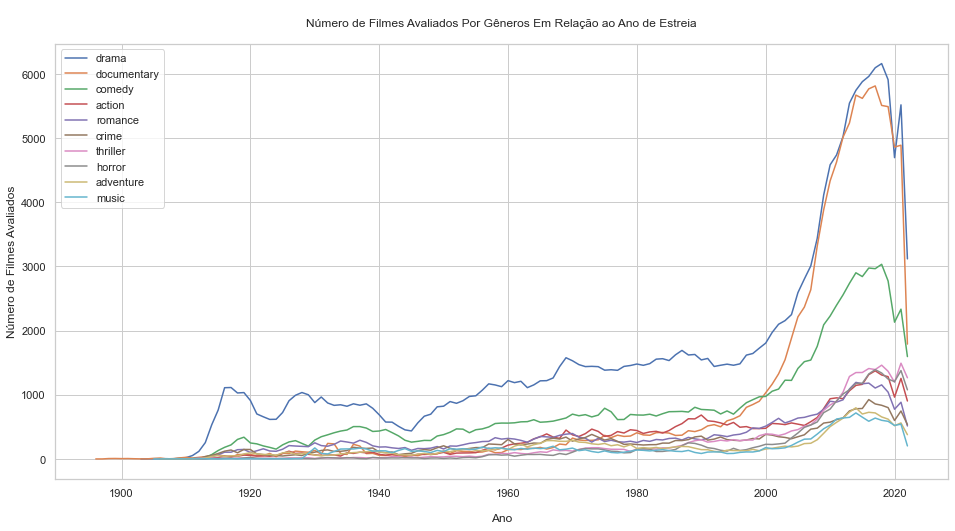

In [22]:
# Plot

plt.figure(figsize = (16,8))
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movie, premiered Year FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movie'])
    
plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gêneros Em Relação ao Ano de Estreia\n')
plt.legend(labels = top_generos)
plt.show()

> Perfeito, aqui podemos ver realmente com mais detalhes a quantidade de avaliações que ocorreu no fim do séculos 19 e início dos séculos 20.<p>
E olha que incrível a quantidade de avaliações que ocorreram a partir dos anos 2000 justamente após o que é chamado da Bolha da Internet que ocorreu entre 94 e 2000.


***
### 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
Vamos verificar o filme

##### Consultado o Banco de Dados
> Vamos consultar a coluna gêneros da tabela Títulos.

In [23]:
consulta6 = '''
            SELECT runtime_minutes Duração
            FROM titles 
            WHERE type = 'movie' 
            AND Duração != 'NaN'
            '''
resultado6 = pd.read_sql_query(consulta6, conn)
display(resultado6)

,Duração
0,100
1,70
2,90
3,120
4,58
...,...
382011,123
382012,57
382013,100
382014,116


In [24]:
# Calculo em percentis
for i in range(101):
    val = i
    perc = round(np.percentile(resultado6['Duração'].values, val), 2)
    print('{} percentil da duração é: {}'.format(val, perc))

0 percentil da duração é: 1.0
1 percentil da duração é: 45.0
2 percentil da duração é: 47.0
3 percentil da duração é: 50.0
4 percentil da duração é: 50.0
5 percentil da duração é: 51.0
6 percentil da duração é: 52.0
7 percentil da duração é: 53.0
8 percentil da duração é: 55.0
9 percentil da duração é: 56.0
10 percentil da duração é: 58.0
11 percentil da duração é: 59.0
12 percentil da duração é: 60.0
13 percentil da duração é: 60.0
14 percentil da duração é: 60.0
15 percentil da duração é: 61.0
16 percentil da duração é: 63.0
17 percentil da duração é: 65.0
18 percentil da duração é: 66.0
19 percentil da duração é: 68.0
20 percentil da duração é: 69.0
21 percentil da duração é: 70.0
22 percentil da duração é: 70.0
23 percentil da duração é: 72.0
24 percentil da duração é: 73.0
25 percentil da duração é: 74.0
26 percentil da duração é: 75.0
27 percentil da duração é: 75.0
28 percentil da duração é: 76.0
29 percentil da duração é: 77.0
30 percentil da duração é: 78.0
31 percentil da dur

> Aqui identificamos um outlier com uma duração de 51420 min, o que pode impactar em análises futuras, vamos verificar que filme é esse.

In [25]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Duração, primary_title Titulo
            FROM titles 
            WHERE type = 'movie' AND Duração != 'NaN'
            ORDER BY Duração DESC
            LIMIT 1
            ''' 
resultado6 = pd.read_sql_query(consulta6, conn)
resultado6

,Duração,Titulo
0,51420,Logistics


>'Logistics' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.

***
### 7- Qual a Relação Entre Duração e Gênero?
Vamos verificar as principais relações entre a duração dos conteúdos com gênero.

##### Consultado o Banco de Dados
> Vamos consultar a coluna gêneros e duração em minutos da tabela Títulos.

In [26]:
# Consultando o banco de Dados
consulta7 = '''
            SELECT runtime_minutes, genres
            FROM titles
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''
resultado7 = pd.read_sql_query(consulta7, conn)

# Calculando a duração por gênero
generos_unicos = retorna_generos(resultado7)
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND runtime_minutes != \'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['runtime_minutes']))
    
# Definando o DataFrame
df_genero_runtime = pd.DataFrame()
df_genero_runtime['Genero'] = generos_unicos
df_genero_runtime['Duração_Média'] = genero_runtime
df_genero_runtime = df_genero_runtime.sort_values(by = 'Duração_Média', ascending = False)

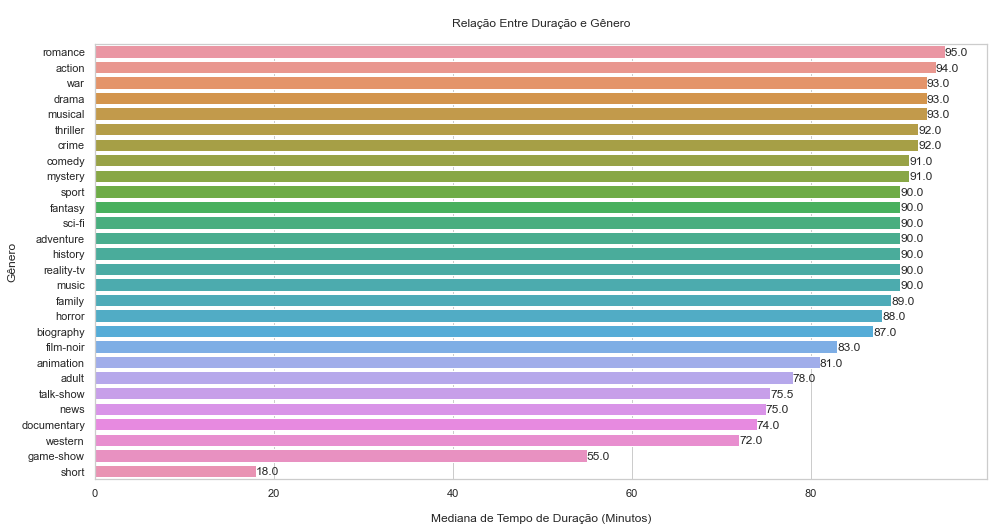

In [27]:
# Gráfico
plt.figure(figsize = (16,8))
sns.barplot(y = df_genero_runtime.Genero, x = df_genero_runtime.Duração_Média, orient = "h")

for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.Duração_Média[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["Duração_Média"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

> Aqui a um resultado esperado, boa parte dos conteúdos possuem uma duração acima de 90 min e podemos ver que curtas tem uma duração médio de 18 minutos.

***
### 8- Qual o número de Filmes Produzidos Por Países
Quais são os 10 países com maior produção de Filmes.

##### Consultado o Banco de Dados
>Vamos consultar a coluna região e contar a quantidade de filmes.

In [28]:
# Consulta
consulta8 = '''
            SELECT region, COUNT(*) Number_of_Movies FROM
            akas JOIN titles on
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            '''
resultado8  = pd.read_sql_query(consulta8, conn)

In [29]:
# listas auxiliares
nomes_paises = []
contagem = []

# Obtendo os nomes dos paises de acordo com a sigla 
for i in range(resultado.shape[0]):
    try:
        count = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = count).name)
        contagem.append(resultado8['Number_of_Movies'].values[i])
    except:
        continue

# DataFrame
df_filmes_paises = pd.DataFrame()
df_filmes_paises['Paises'] = nomes_paises
df_filmes_paises['Número_de_Filmes'] = contagem
# Ordenando
df_filmes_paises = df_filmes_paises.sort_values(by = 'Número_de_Filmes', ascending = False)

In [30]:
display(df_filmes_paises)

,Paises,Número_de_Filmes
199,United States,310299
65,United Kingdom,159321
96,Japan,91255
63,France,84551
89,India,80826
...,...,...
130,Northern Mariana Islands,1
100,Kiribati,1
208,Samoa,1
102,Saint Kitts and Nevis,1


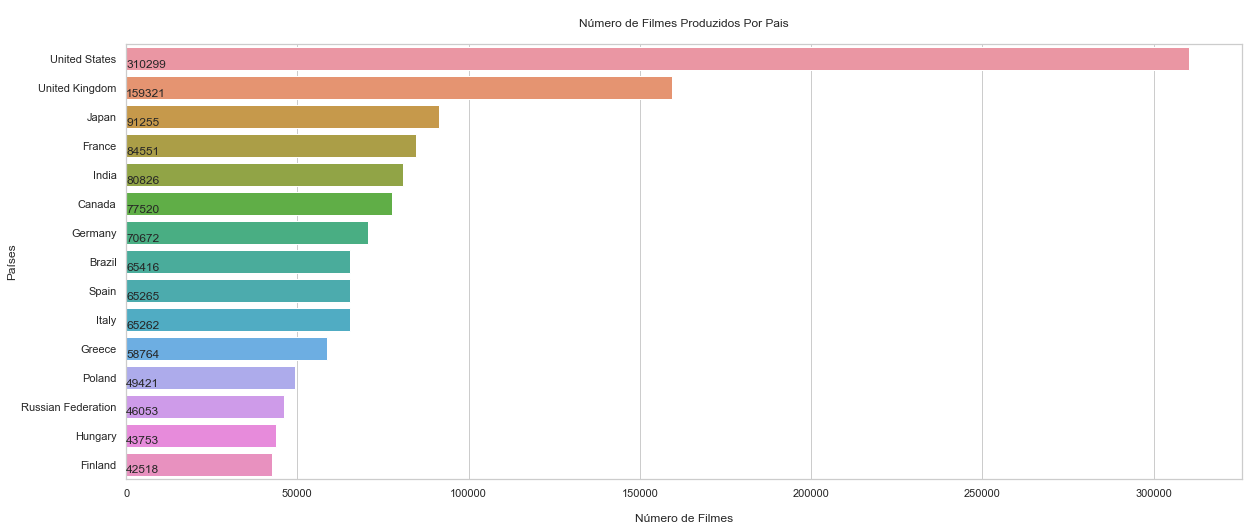

In [31]:
# Gráfico
plt.figure(figsize = (20,8))
sns.barplot(y = df_filmes_paises[:15].Paises, x = df_filmes_paises[:15].Número_de_Filmes, orient = "h")

for i in range(0,15):
    plt.text(df_filmes_paises.Paises[df_filmes_paises.index[i]]==1,
             i + 0.30, 
             round(df_filmes_paises["Número_de_Filmes"][df_filmes_paises.index[i]],2))

plt.ylabel('Países')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por Pais\n')
plt.show()

> Como esperado, Estados Unidos possui a maior produção de filmes neste banco de dados, seguido do Reino Unidos, Brasil vem na oitava.

***
### 9- Quais São os Top 10 Melhores Filmes?

##### Consultado o Banco de Dados
> Vamos consultar na coluna o título do filme seus Gêneros e a Avaliação.

In [32]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,Jai Bhim,"Crime,Drama,Mystery",9.4
1,The Shawshank Redemption,Drama,9.3
2,The Chaos Class,"Comedy,Drama",9.3
3,Soorarai Pottru,Drama,9.3
4,Mirror Game,"Crime,Mystery,Thriller",9.3
5,The Godfather,"Crime,Drama",9.2
6,CM101MMXI Fundamentals,"Comedy,Documentary",9.2
7,The Dark Knight,"Action,Crime,Drama",9.1
8,12 Angry Men,"Crime,Drama",9.0
9,The Godfather: Part II,"Crime,Drama",9.0


> **Jai Bhim** é um drama indiano com o tema jurídico que fala sobre um homem tribal que foi preso por um suposto caso de roubo e a sua esposa recorre a um advogado de direitos humanos para ajudar a fazer justiça.


### 10- Quais São os Top 10 Piores Filmes?
Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [33]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.1
1,Sadak 2,"Action,Drama",1.1
2,Smolensk,"Drama,Thriller",1.2
3,The Cost of Deception,"Crime,Drama,History",1.6
4,Reis,"Biography,Drama",1.6
5,Justin Bieber: Never Say Never,"Documentary,Music",1.7
6,Manos: The Hands of Fate,Horror,1.9
7,Radhe,"Action,Crime,Thriller",1.9
8,Disaster Movie,"Comedy,Sci-Fi",1.9
9,The Hottie & the Nottie,"Comedy,Romance",2.0


> **Cumali Ceber** bem esse filme não consegui descrever o que ele é de fato, acho melhor vocês darem uma olhada no trailer.